In [1]:
%matplotlib inline
import pandas as pd
import csv as csv
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
import matplotlib
import matplotlib.pylab as pl
from matplotlib import rcParams
import sqlite3

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
conn = sqlite3.connect('../jan13.db')

In [3]:
with open('../queries/value_demand.sql') as query:
    ds = pd.read_sql(query.read(),conn)

In [4]:
ds.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration
0,89D227B655E5C82AECF13C3F540D4CF4,2013-01-01 15:11:48,2013-01-01 15:18:10,-73.978165,40.757977,-73.989838,40.751171,8.409691,382
1,DFD2202EE08F7A8DC9A57B02ACB81FE2,2013-01-07 23:25:03,2013-01-07 23:34:24,-73.976250,40.748528,-74.002586,40.747868,12.401491,560
2,20D9ECB2CA0767CF7A01564DF2844A3E,2013-01-07 15:27:48,2013-01-07 15:38:37,-73.966743,40.764252,-73.983322,40.743763,11.901491,648
3,496644932DF3932605C22C7926FF0FE0,2013-01-08 11:01:15,2013-01-08 11:08:14,-73.995804,40.743977,-74.007416,40.744343,7.827724,418
4,0B57B9633A2FECD3D3B1944AFC7471CF,2013-01-07 12:39:18,2013-01-07 13:10:56,-73.989937,40.756775,-73.865250,40.770630,45.217860,1898


In [5]:
len(ds)

11444817

In [6]:
ds = ds[ds.groupby('medallion').medallion.transform(len)>1]

In [7]:
ds.medallion.nunique()

13263

In [8]:
ds['pu_time'] = pd.to_datetime(ds['pu_time'])
ds['do_time'] = pd.to_datetime(ds['do_time'])

In [8]:
#med_sample = pd.concat([ds[ds.medallion==ds.medallion[2000]],ds[ds.medallion==ds.medallion[3000]],\
#                        ds[ds.medallion==ds.medallion[4000]]])

In [9]:
def compute_wait(df):
    #df need to have the columns 'medallion', 'pu_time', 'do_time'
    #attaching the wait time to
    
    #the pickup location row
    a = [np.nan]
    
    #the dropoff location row
    #a = []
    
    df = df.sort_values('pu_time')
    df.index = range(len(df))
    
    if len(df)>1:
        for i in range(len(df)-2):
            time_diff = (df.pu_time[i+1] - df.do_time[i]).total_seconds()
            a.append(time_diff)
    else:
        print 'fuck that shit'
    
    a.append(np.nan)
    
#    print len(df)
#    print len(a)
    df['wait_seconds'] = a
    
    return df

In [10]:
grouped = ds.groupby('medallion')

In [11]:
ds = grouped.apply(compute_wait)

In [12]:
ds.index = range(len(ds))

In [13]:
ds.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration,wait_seconds
0,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:29:39,2013-01-01 00:37:47,-73.976624,40.751686,-73.949348,40.776871,12.983458,487,NaN
1,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:39:16,2013-01-01 00:58:43,-73.948524,40.778000,-73.978966,40.780052,19.200000,1166,89
2,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:59:38,2013-01-01 01:05:59,-73.979164,40.780136,-73.961884,40.774754,9.491658,380,55
3,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:07:33,2013-01-01 01:19:52,-73.962669,40.775368,-73.956116,40.804432,16.475258,738,94
4,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:21:23,2013-01-01 01:56:09,-73.955887,40.804317,-74.000214,40.721714,32.770326,2085,91


In [14]:
len(ds)

11444815

In [15]:
len(ds[ds.wait_seconds>=0])

11417192

In [16]:
ds = ds[ds.wait_seconds>=0]

In [17]:
len(ds)

11417192

In [18]:
ds['trip_value'] = ds['tot_amount'] / ((ds['duration'] + ds['wait_seconds']) / 3600)

In [19]:
ds.head()

,medallion,pu_time,do_time,pu_lon,pu_lat,do_lon,do_lat,tot_amount,duration,wait_seconds,trip_value
1,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:39:16,2013-01-01 00:58:43,-73.948524,40.778000,-73.978966,40.780052,19.200000,1166,89,55.075697
2,00005007A9F30E289E760362F69E4EAD,2013-01-01 00:59:38,2013-01-01 01:05:59,-73.979164,40.780136,-73.961884,40.774754,9.491658,380,55,78.551651
3,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:07:33,2013-01-01 01:19:52,-73.962669,40.775368,-73.956116,40.804432,16.475258,738,94,71.287175
4,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:21:23,2013-01-01 01:56:09,-73.955887,40.804317,-74.000214,40.721714,32.770326,2085,91,54.215613
5,00005007A9F30E289E760362F69E4EAD,2013-01-01 01:57:45,2013-01-01 02:16:48,-74.002373,40.719803,-73.973053,40.792763,28.600000,1142,96,83.166397


In [21]:
ds = ds[ds.wait_seconds<3600] #more than 1h wait is quite certainly a stop

In [22]:
valuebyhour = ds.groupby([ds.pu_time.map(lambda x: x.hour)]).aggregate({'trip_value':'mean'})

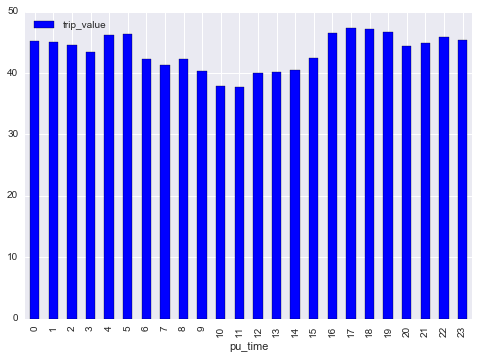

In [23]:
valuebyhour.plot.bar()

In [22]:
ds.to_csv('../VALUE_FULL_puwait')

In [24]:
uniquecabbyhour = ds.groupby([ds.pu_time.map(lambda x: x.hour)]).aggregate({'trip_value':'mean','medallion': pd.Series.nunique})

In [25]:
uniquecabbyhour

,trip_value,medallion
pu_time,,
0,45.233825,12422
1,45.093104,12177
2,44.494891,11768
3,43.354585,11131
4,46.189679,10201
5,46.332798,8587
6,42.243159,9788
7,41.275280,11557
8,42.204998,12328


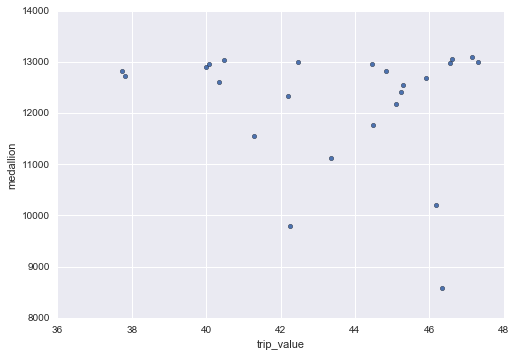

In [26]:
uniquecabbyhour.plot.scatter(x='trip_value', y='medallion')